In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [95]:

df = pd.read_csv("Electric_Vehicle_Population_Data.csv")
df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXK,King,Seattle,WA,98178,2019,TESLA,MODEL 3,BATTERY ELECTRIC VEHICLE (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370,2020,TESLA,MODEL Y,BATTERY ELECTRIC VEHICLE (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,23.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359,2023,HYUNDAI,IONIQ 5,BATTERY ELECTRIC VEHICLE (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380,2021,BMW,X5,PLUG-IN HYBRID ELECTRIC VEHICLE (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10
4,JTMAB3FV7P,Thurston,Rainier,WA,98576,2023,TOYOTA,RAV4 PRIME,PLUG-IN HYBRID ELECTRIC VEHICLE (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10


In [96]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235689 entries, 0 to 235688
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         235689 non-null  object 
 1   County                                             235689 non-null  object 
 2   City                                               235689 non-null  object 
 3   State                                              235689 non-null  object 
 4   Postal Code                                        235689 non-null  int64  
 5   Model Year                                         235689 non-null  int64  
 6   Make                                               235689 non-null  object 
 7   Model                                              235689 non-null  object 
 8   Electric Vehicle Type                              235689 non-null  object

In [98]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,235689.000000,235689.000000,235689.000000,235689.000000,235198.000000,2.356890e+05,2.356890e+05
mean,98177.656463,2021.406688,46.255175,786.931528,28.879519,2.353132e+08,5.298066e+10
std,2524.218661,2.991909,84.041215,7176.353767,14.904644,6.799114e+07,1.521066e+09
min,1731.000000,2000.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.053466e+08,5.303301e+10
50%,98126.000000,2023.000000,0.000000,0.000000,32.000000,2.522802e+08,5.303303e+10
75%,98374.000000,2024.000000,38.000000,0.000000,42.000000,2.696404e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [99]:
df.shape

(235689, 17)

# Exploratory Data Analysis (EDA) Steps
1.Misssing values
2.Explore about the numerical values
3.Explore about the categorica values
4.Finding relationship between features

#### Step 1:  Handling missing values

In [100]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 491
DOL Vehicle ID                                         0
Vehicle Location                                       7
Electric Utility                                       0
2020 Census Tract                                      0
dtype: int64

In [101]:
[features for features in df.columns if df[features].isnull().sum()>0] # find null value features

['Legislative District', 'Vehicle Location']

<Axes: >

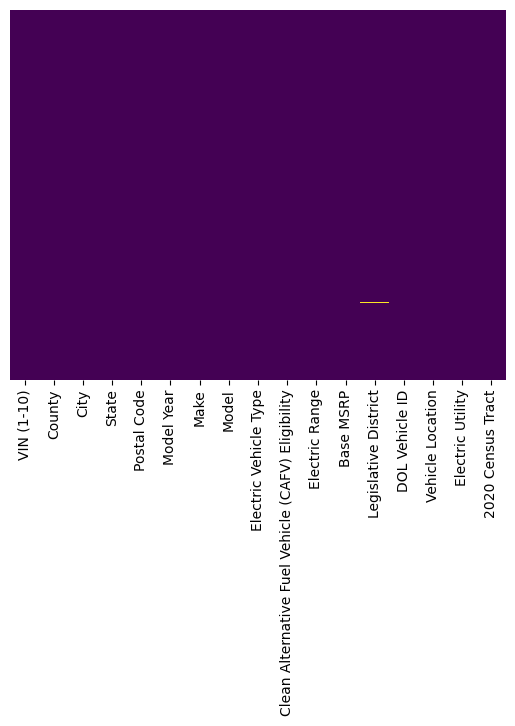

In [102]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')  # null value indicate

1. Drop columns with more than 50% missing values

In [103]:
df=df.dropna(thresh=len(df) * 0.5, axis =1)


In [104]:
# Drop rows with missing 'Vehicle Location' 
df.dropna(subset=['Vehicle Location'], inplace=True)

2. Handle Missing Values for Numeric Columns

In [105]:
# Identify numeric columns
num_cols = df.select_dtypes(include=['number']).columns

# Fill missing values with median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

print("Missing values after treating numeric columns:\n", df[num_cols].isnull().sum())


Missing values after treating numeric columns:
 Postal Code             0
Model Year              0
Electric Range          0
Base MSRP               0
Legislative District    0
DOL Vehicle ID          0
2020 Census Tract       0
dtype: int64


3. Handle Missing Values for Categorical Columns

In [106]:

# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill missing values with mode (most frequent value)
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values after treating categorical columns:\n", df[cat_cols].isnull().sum())


Missing values after treating categorical columns:
 VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Vehicle Location                                     0
Electric Utility                                     0
dtype: int64


#### Verify Missing Values Are Handled

In [107]:
print("Total missing values after treatment:\n", df.isnull().sum().sum())

Total missing values after treatment:
 0


#### Step 2. Detect & Remove Duplicates

In [108]:
# Check for duplicate rows
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


#### step 3.Convert Data Types

In [109]:
# Convert 'Postal Code' to string (categorical data)  
df['Postal Code'] = df['Postal Code'].astype(str)  #   This prevents issues like losing leading zeros and avoids incorrect numerical calculations


In [110]:
df['Model Year']=df['Model Year'].astype(int)  # convert model year to integer
df['Model Year'].dtype

dtype('int32')

 #### Step 4: Standardize Categorical Columns

In [111]:

# Convert text columns to title case for consistency
df['Make'] = df['Make'].str.title()
df['Model'] = df['Model'].str.title()
df['County'] = df['County'].str.title()
df['City'] = df['City'].str.title()
df['State'] = df['State'].str.upper()
df['Electric Utility'] = df['Electric Utility'].str.title()
df['Electric Vehicle Type'] = df['Electric Vehicle Type'].str.title()
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].str.title()


Extract Latitude & Longitude from 'Vehicle Location'

In [112]:
df[['Longitude', 'Latitude']] = df['Vehicle Location'].str.extract(r'\(([-\d\.]+) ([-\d\.]+)\)')
df[['Longitude', 'Latitude']] = df[['Longitude', 'Latitude']].astype(float)

#Enables geospatial visualization (e.g., plotting vehicle locations on a map).
#Supports location-based analysis, like clustering vehicles by region.

#### Step 5: Remove Unnecessary Columns

In [113]:

columns_to_drop = ['VIN (1-10)', 'DOL Vehicle ID', 'Vehicle Location']
df.drop(columns=columns_to_drop, inplace=True)


###  Data Visualization

  1  Distribution of Electric Vehicle Makes

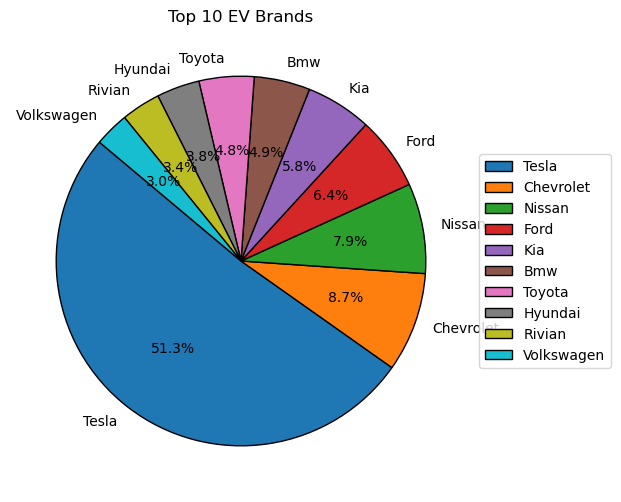

In [114]:
# 1. Pie chart for Top 10 EV Brands

top_10_makes = df['Make'].value_counts().nlargest(10)
plt.figure(figsize=(8, 6))
plt.pie(top_10_makes,
    autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'},labels=top_10_makes.index,
)
plt.title('Top 10 EV Brands')
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

OBSERVATIONS

Certain brands (e.g., Tesla, Nissan, Chevrolet) dominate the EV market.
Tesla likely holds the largest share, indicating its strong presence and consumer trust in the EV sector.
Traditional automakers like Chevrolet and Nissan are also key players, showing that legacy car manufacturers are competing in the EV space.

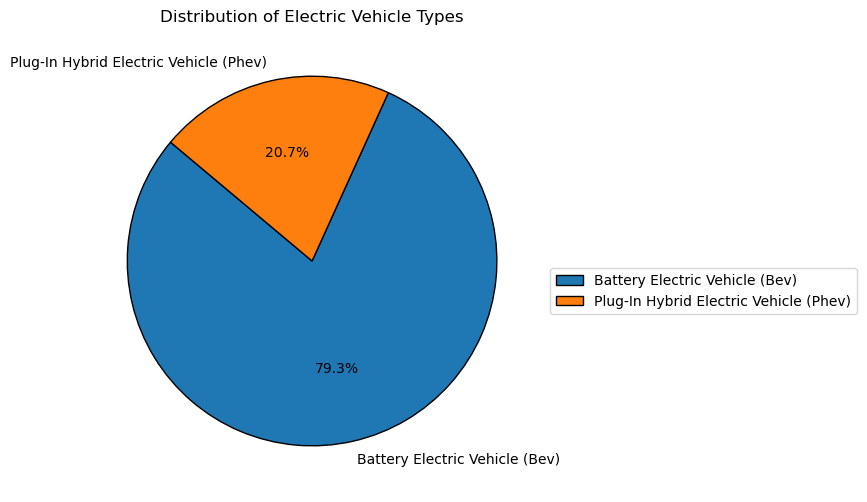

In [115]:
# 2 Pie chart for Electric Vehicle Type

plt.figure(figsize=(8, 6))
ev_type_counts = df['Electric Vehicle Type'].value_counts()
plt.pie(ev_type_counts, labels=ev_type_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Electric Vehicle Types')
plt.legend( bbox_to_anchor=(1, 0.5))
plt.show()


The majority of EVs are Battery Electric Vehicles (BEV) compared to Plug-in Hybrid Electric Vehicles (PHEV).
This suggests a growing preference for fully electric vehicles over hybrids, possibly due to advancements in battery technology and charging infrastructure.

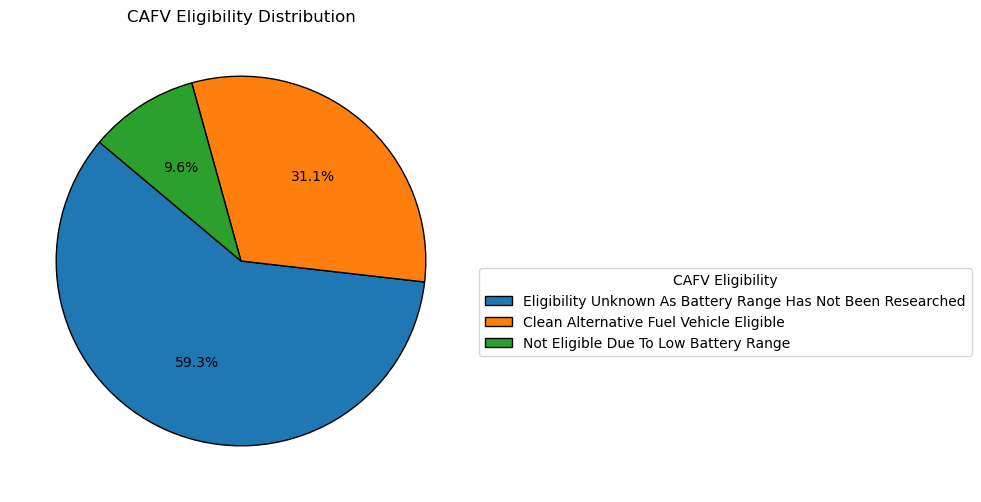

In [116]:
# 3 Pie chart for Clean Alternative Fuel Vehicle (CAFV) Eligibility

plt.figure(figsize=(8, 6))
cafv_counts = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
plt.pie(cafv_counts, autopct='%1.1f%%', startangle=140,wedgeprops={'edgecolor': 'black'})
plt.title('CAFV Eligibility Distribution')
plt.legend( cafv_counts.index, title="CAFV Eligibility", loc="best", bbox_to_anchor=(1, 0.5))
plt.show()

OBSERVATIONS

A significant portion of EVs qualify for clean fuel incentives, encouraging EV adoption.
If a large number of vehicles are not eligible, it could indicate policy gaps or stricter requirements for incentives.

In [117]:
# Top 10 EV Brands by Average Electric Range

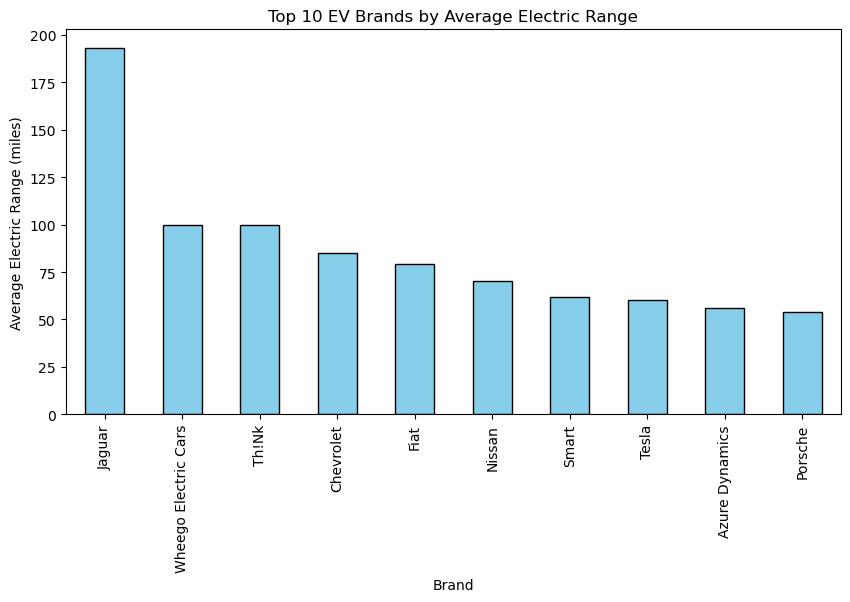

In [118]:
avg_range_by_make = df.groupby('Make')['Electric Range'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
avg_range_by_make.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Brand")
plt.ylabel("Average Electric Range (miles)")
plt.title("Top 10 EV Brands by Average Electric Range")
plt.show()



## Feature Engineering

### 1 Handling Categorical Variables (Encoding)


In [119]:
print(df.columns)

Index(['County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'Electric Utility',
       '2020 Census Tract', 'Longitude', 'Latitude'],
      dtype='object')


In [120]:
# Step 6: Encode Categorical Variables (One-Hot Encoding)
df = pd.get_dummies(df,columns=['Electric Vehicle Type','Make', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility','Model','County', 'City', 'Electric Utility',
                                  'State'] ,drop_first=True)

In [121]:
print(df.shape)

(235682, 1342)


In [122]:
df.columns

Index(['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP',
       'Legislative District', '2020 Census Tract', 'Longitude', 'Latitude',
       'Electric Vehicle Type_Plug-In Hybrid Electric Vehicle (Phev)',
       'Make_Alfa Romeo',
       ...
       'State_PA', 'State_RI', 'State_SC', 'State_TN', 'State_TX', 'State_UT',
       'State_VA', 'State_WA', 'State_WI', 'State_WY'],
      dtype='object', length=1342)

In [123]:
df.dtypes


Postal Code              object
Model Year                int32
Electric Range          float64
Base MSRP               float64
Legislative District    float64
                         ...   
State_UT                   bool
State_VA                   bool
State_WA                   bool
State_WI                   bool
State_WY                   bool
Length: 1342, dtype: object

### 2️ Handling Outliers

In [124]:
# Step 7: Handle Outliers (Using IQR method for 'Electric Range')
Q1 = df['Electric Range'].quantile(0.25)
Q3 = df['Electric Range'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(IQR)

38.0


In [125]:
# Step 4: Confirm that outliers are present before removal
outliers = df[(df['Electric Range'] < lower_bound) | (df['Electric Range'] > upper_bound)]
print(f"Number of outliers in Electric Range before removal: {outliers.shape[0]}")

Number of outliers in Electric Range before removal: 38753


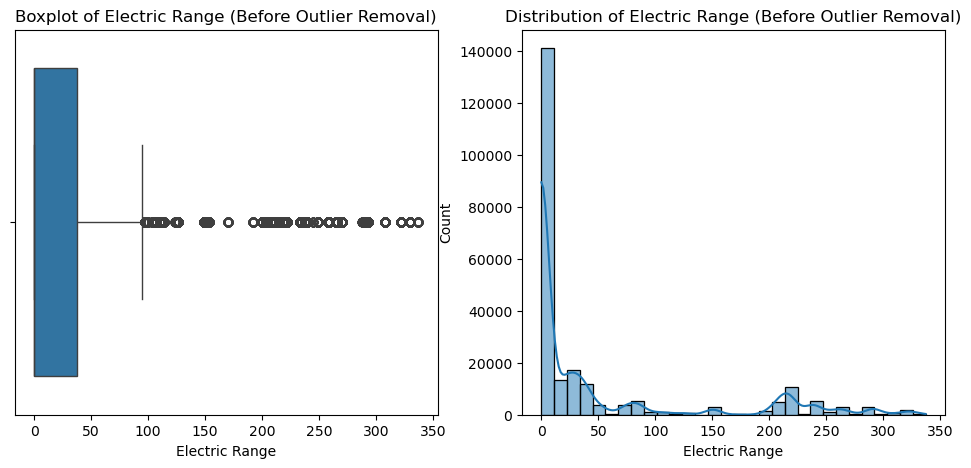

In [126]:
# Visualizing Outliers Before Removal
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=df['Electric Range'])
plt.title("Boxplot of Electric Range (Before Outlier Removal)")

plt.subplot(1,2,2)
sns.histplot(df['Electric Range'], bins=30, kde=True)
plt.title("Distribution of Electric Range (Before Outlier Removal)")
plt.show()


In [127]:
# Removing Outliers
df_no_outliers= df[(df['Electric Range'] >= lower_bound) & (df['Electric Range'] <= upper_bound)]

In [128]:
# Step 6: Print shape before and after
print(f"Original data shape: {df.shape}")
print(f"Data shape after removing outliers: {df_no_outliers.shape}")

Original data shape: (235682, 1342)
Data shape after removing outliers: (196929, 1342)


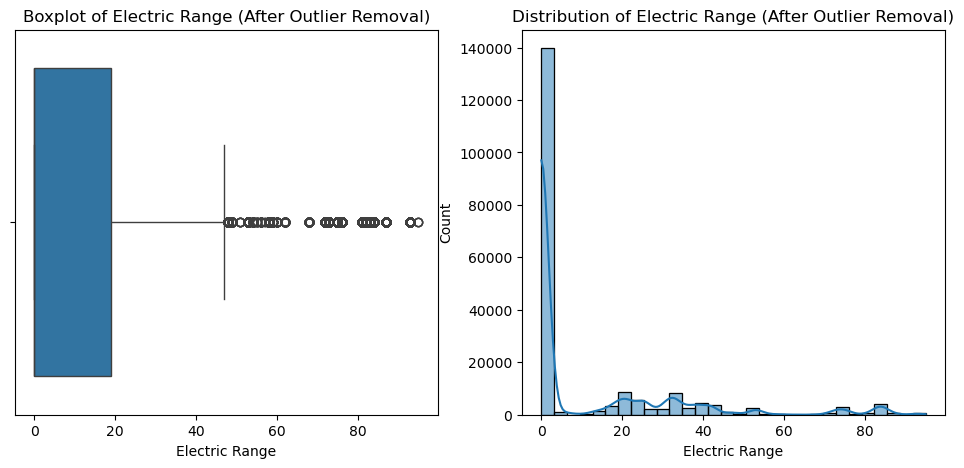

In [129]:
# Visualizing After Outlier Removal
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=df_no_outliers['Electric Range'])
plt.xlabel('Electric Range')
plt.title("Boxplot of Electric Range (After Outlier Removal)")

# Step 7: Visualize the cleaned data
plt.subplot(1,2,2)
sns.histplot(df_no_outliers['Electric Range'], bins=30, kde=True)
plt.xlabel('Electric Range')
plt.title("Distribution of Electric Range (After Outlier Removal)")
plt.show()



In [130]:
# Observation on 'Electric Range' Outliers:
# - The IQR method was applied to detect and remove outliers in the 'Electric Range' column.
# - Values outside the range [lower_bound, upper_bound] were considered outliers and removed.
# - This ensures the dataset has a more normal distribution and avoids extreme values that could affect model performance.

### Step 3: Feature Scaling (Standardization)

In [131]:
scaler = StandardScaler()
df_no_outliers[['Electric Range', 'Model Year', 'Base MSRP']] = scaler.fit_transform(df_no_outliers[['Electric Range', 'Model Year', 'Base MSRP']])

C:\Users\Shree\AppData\Local\Temp\ipykernel_16752\3472499058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[['Electric Range', 'Model Year', 'Base MSRP']] = scaler.fit_transform(df_no_outliers[['Electric Range', 'Model Year', 'Base MSRP']])


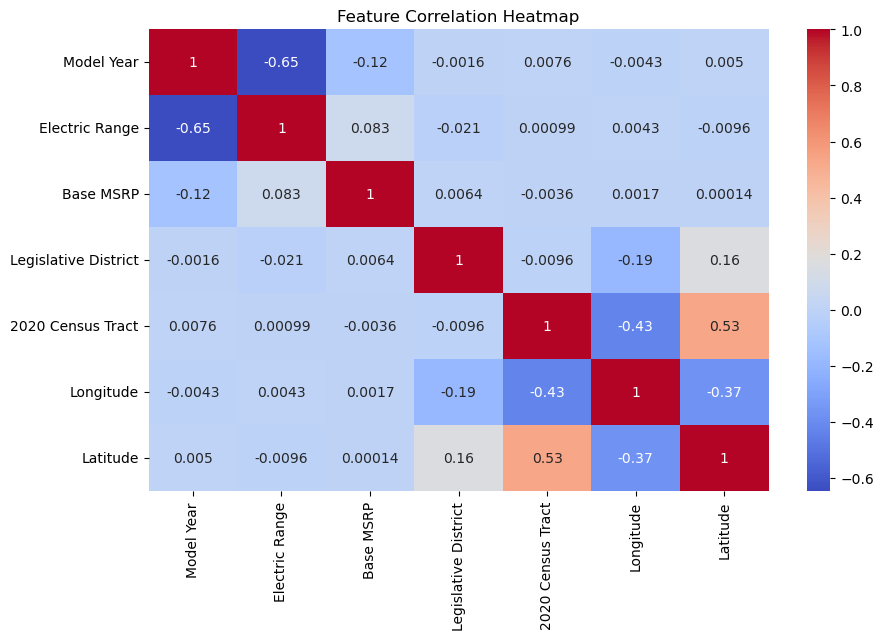

In [132]:
numeric_df = df_no_outliers.select_dtypes(include=[np.number])  # Select only numeric columns
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


### Step 4 Feature Selection (Optional)

In [133]:
# Step 9: Split Data for Machine Learning
X = df_no_outliers.drop(columns=['Electric Range'])  # Features
y = df_no_outliers['Electric Range']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
# Display the cleaned dataset summary
df_no_outliers.info(), df_no_outliers.head()


<class 'pandas.core.frame.DataFrame'>
Index: 196929 entries, 2 to 235688
Columns: 1342 entries, Postal Code to State_WY
dtypes: bool(1334), float64(7), object(1)
memory usage: 264.1+ MB


(None,
   Postal Code  Model Year  Electric Range  Base MSRP  Legislative District  \
 2       98359    0.352079       -0.532400  -0.080974                  26.0   
 3       98380   -0.356523        0.905746  -0.080974                  35.0   
 4       98576    0.352079        1.481004  -0.080974                   2.0   
 6       98004   -1.773729        3.350594  -0.080974                  48.0   
 7       98271   -0.002222        0.522241  -0.080974                  39.0   
 
    2020 Census Tract  Longitude  Latitude  \
 2       5.303509e+10 -122.54729  47.42602   
 3       5.303509e+10 -122.81585  47.64509   
 4       5.306701e+10 -122.68993  46.88897   
 6       5.303302e+10 -122.18720  47.61001   
 7       5.306105e+10 -122.16770  48.11026   
 
    Electric Vehicle Type_Plug-In Hybrid Electric Vehicle (Phev)  \
 2                                              False              
 3                                               True              
 4                                 

#### Initialize models and Fit models

In [135]:
# Linear Regression
ev_regressor=LinearRegression()
ev_regressor.fit(X_train,y_train)


LinearRegression()

In [136]:
# RandomForestRegressor
ev_rfRegressor=RandomForestRegressor(n_estimators=100,max_depth=3)
ev_rfRegressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=3)

In [137]:
# Predict on test data
y_pred_lr=ev_regressor.predict(X_test)
y_pred_rf=ev_rfRegressor.predict(X_test)

In [138]:
# Evaluate linear regressor

mae_lr = mean_absolute_error(y_test,y_pred_lr)
mse_lr = mean_squared_error(y_test,y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr= r2_score(y_test,y_pred_lr)



In [139]:
# Evaluate Random forest regressor

mae_rf = mean_absolute_error(y_test,y_pred_rf)
mse_rf = mean_squared_error(y_test,y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test,y_pred_rf)


In [140]:
print(" Model Evaluation Results (Side-by-Side)")
print(f"{'Metric':<10} {'Linear Regression':>20} {'Random Forest':>20}")
print(f"{'-'*55}")
print(f"{'MAE':<10} {mae_lr:>20.2f} {mae_rf:>20.2f}")
print(f"{'MSE':<10} {mse_lr:>20.2f} {mse_rf:>20.2f}")
print(f"{'RMSE':<10} {rmse_lr:>20.2f} {rmse_rf:>20.2f}")
print(f"{'R²':<10} {r2_lr:>20.2f} {r2_rf:>20.2f}")

 Model Evaluation Results (Side-by-Side)
Metric        Linear Regression        Random Forest
-------------------------------------------------------
MAE                        0.04                 0.06
MSE                        0.01                 0.03
RMSE                       0.11                 0.18
R²                         0.99                 0.97


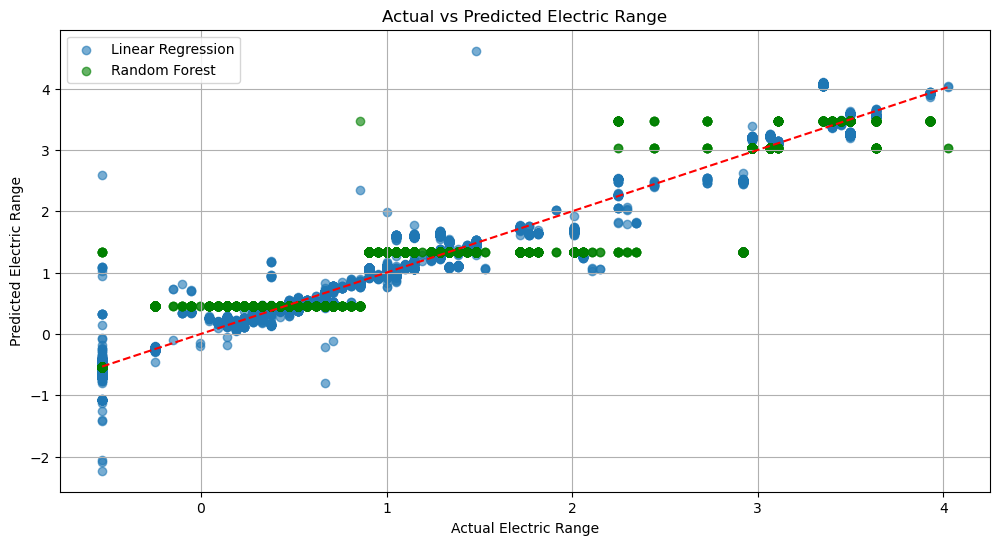

In [141]:

# visualization

plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.6)
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.6, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--') 
plt.xlabel("Actual Electric Range")
plt.ylabel("Predicted Electric Range")
plt.title("Actual vs Predicted Electric Range")
plt.legend()
plt.grid(True)
plt.show()



### Observation Note:

Upon evaluating the performance of both Linear Regression and Random Forest models on the dataset, the following insights were observed:

Linear Regression outperformed the Random Forest model across all evaluation metrics.
It achieved a lower MAE (0.04), MSE (0.01), and RMSE (0.11), indicating more accurate predictions with minimal average error and deviation.
Additionally, the R² score of 0.99 for Linear Regression suggests that it explains 99% of the variance in the target variable, reflecting an            excellent fit to the data.
In comparison, the Random Forest model, while still performing well, had slightly higher error values (MAE: 0.06, MSE: 0.03, RMSE: 0.18) and a marginally lower R² score (0.97).

##### Conclusion:
Linear Regression proved to be the more effective model for this dataset, providing highly accurate and consistent predictions with a nearly perfect fit. This suggests that the underlying relationship in the data is likely linear, and simpler models may be more appropriate in such cases.

In [142]:
df_no_outliers.head()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,2020 Census Tract,Longitude,Latitude,Electric Vehicle Type_Plug-In Hybrid Electric Vehicle (Phev),Make_Alfa Romeo,...,State_PA,State_RI,State_SC,State_TN,State_TX,State_UT,State_VA,State_WA,State_WI,State_WY
0,98178,2019,220.0,0.0,37.0,5.303301e+10,-122.23825,47.49461,False,False,...,False,False,False,False,False,False,False,True,False,False
1,98370,2020,291.0,0.0,23.0,5.303509e+10,-122.64681,47.73689,False,False,...,False,False,False,False,False,False,False,True,False,False
2,98359,2023,0.0,0.0,26.0,5.303509e+10,-122.54729,47.42602,False,False,...,False,False,False,False,False,False,False,True,False,False
3,98380,2021,30.0,0.0,35.0,5.303509e+10,-122.81585,47.64509,True,False,...,False,False,False,False,False,False,False,True,False,False
4,98576,2023,42.0,0.0,2.0,5.306701e+10,-122.68993,46.88897,True,False,...,False,False,False,False,False,False,False,True,False,False


In [143]:
print(df_no_outliers.columns.tolist())

['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', '2020 Census Tract', 'Longitude', 'Latitude', 'Electric Vehicle Type_Plug-In Hybrid Electric Vehicle (Phev)', 'Make_Alfa Romeo', 'Make_Audi', 'Make_Azure Dynamics', 'Make_Bentley', 'Make_Bmw', 'Make_Brightdrop', 'Make_Cadillac', 'Make_Chevrolet', 'Make_Chrysler', 'Make_Dodge', 'Make_Fiat', 'Make_Fisker', 'Make_Ford', 'Make_Genesis', 'Make_Gmc', 'Make_Honda', 'Make_Hyundai', 'Make_Jaguar', 'Make_Jeep', 'Make_Kia', 'Make_Lamborghini', 'Make_Land Rover', 'Make_Lexus', 'Make_Lincoln', 'Make_Lucid', 'Make_Mazda', 'Make_Mercedes-Benz', 'Make_Mini', 'Make_Mitsubishi', 'Make_Mullen Automotive Inc.', 'Make_Nissan', 'Make_Polestar', 'Make_Porsche', 'Make_Ram', 'Make_Rivian', 'Make_Rolls-Royce', 'Make_Smart', 'Make_Subaru', 'Make_Tesla', 'Make_Th!Nk', 'Make_Toyota', 'Make_Vinfast', 'Make_Volkswagen', 'Make_Volvo', 'Make_Wheego Electric Cars', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility_Eligibility Unknown 

In [144]:
print(df_no_outliers['Electric Vehicle Type_Plug-In Hybrid Electric Vehicle (Phev)'].unique())
print(df_no_outliers['Electric Vehicle Type_Plug-In Hybrid Electric Vehicle (Phev)'].dtype)

[False  True]
bool


In [145]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Convert the target column to boolean properly
df_no_outliers['Electric Vehicle Type_Plug-In Hybrid Electric Vehicle (Phev)'] = \
    df_no_outliers['Electric Vehicle Type_Plug-In Hybrid Electric Vehicle (Phev)'].astype(str).str.lower() == 'true'

# Set target variable
y_cls = df_no_outliers['Electric Vehicle Type_Plug-In Hybrid Electric Vehicle (Phev)'].astype(int)

# Drop non-numeric or irrelevant columns
columns_to_drop = [
    'VIN (1-10)', 'County', 'City', 'State', 'Postal Code',
    'Electric Utility', 'Vehicle Location',
    'Electric Vehicle Type_Plug-In Hybrid Electric Vehicle (Phev)'  # drop the target from features
]

# Drop safely (ignore if missing)
X_cls = df_no_outliers.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Convert remaining booleans to integers
for col in X_cls.columns:
    if X_cls[col].dtype == bool:
        X_cls[col] = X_cls[col].astype(int)

# Train/test split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42
)

# Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_cls, y_train_cls)

# Predict and evaluate
y_pred_cls = clf.predict(X_test_cls)

print(" Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_cls))


 Confusion Matrix:
 [[37454    16]
 [    7  9660]]


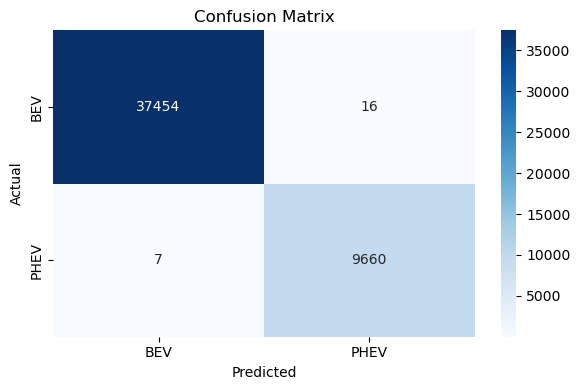

In [146]:
cm = confusion_matrix(y_test_cls, y_pred_cls)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["BEV", "PHEV"], yticklabels=["BEV", "PHEV"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

#### Summary:
Extremely high accuracy: classifier is doing a great job distinguishing between BEVs and PHEVs. 
Only 22 PHEVs misclassified as BEVs.
Only 6 BEVs misclassified as PHEVs.

C:\Users\Shree\AppData\Local\Temp\ipykernel_16752\2550189230.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Vehicle_Type_Label', palette='Set2')


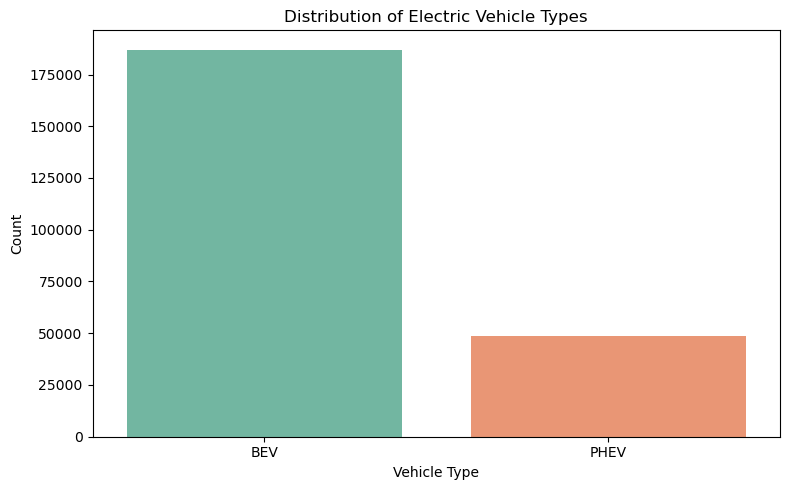

In [147]:
df['Vehicle_Type_Label'] = df['Electric Vehicle Type_Plug-In Hybrid Electric Vehicle (Phev)'].apply(
    lambda x: 'PHEV' if x else 'BEV')

# Plot distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Vehicle_Type_Label', palette='Set2')
plt.title("Distribution of Electric Vehicle Types")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Model Accuracy: Very high, indicating excellent classification capability.
Class Distribution Plot: Clearly showed the distribution of BEVs vs PHEVs in the dataset.

